In [3]:
!pip install xlrd
!pip install pandas openpyxl
import openpyxl 

wb = openpyxl.load_workbook('C:\Users\DeLux\Documents\Python Scripts')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1892480602.py, line 5)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'block_all.xls'

# Use xlrd engine for reading .xls files
df = pd.read_excel(file_path, engine='xlrd')

# Inspect the data (optional)
print(df.head())
print(df.info())

  Publication Type                                            Authors  \
0                J       Wu, W; Chen, W; Fu, YL; Jiang, YS; Huang, GQ   
1                J                              Molinaro, M; Orzes, G   
2                J  Huynh-The, T; Pham, QV; Pham, XQ; Nguyen, TT; ...   
3                J                                Rahman, MJ; Ziru, A   
4                J                                 Zhang, YX; Zhao, F   

   Book Authors Book Editors  Book Group Authors  \
0           NaN          NaN                 NaN   
1           NaN          NaN                 NaN   
2           NaN          NaN                 NaN   
3           NaN          NaN                 NaN   
4           NaN          NaN                 NaN   

                                   Author Full Names  Book Author Full Names  \
0  Wu, Wei; Chen, Wei; Fu, Yelin; Jiang, Yishuo; ...                     NaN   
1                 Molinaro, Margherita; Orzes, Guido                     NaN   
2  Huynh

In [5]:
# Assuming the text data is in a column named 'Text' (you can adjust this based on your data)
texts = df['Abstract'].dropna().tolist()

# Preprocessing the text data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token.isalpha() and token not in stop_words]

processed_texts = [preprocess(text) for text in texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DeLux\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DeLux\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#df = pd.concat([df, df2], axis=0)

In [10]:
# Create Dictionary and Corpus needed for Topic Modeling
id2word = corpora.Dictionary(processed_texts)
corpus = [id2word.doc2bow(text) for text in processed_texts]

In [14]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=9,  # You can adjust the number of topics
                                            random_state=42,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [15]:
df

Publication Type                                            Authors  \
0                   J       Wu, W; Chen, W; Fu, YL; Jiang, YS; Huang, GQ   
1                   J                              Molinaro, M; Orzes, G   
2                   J  Huynh-The, T; Pham, QV; Pham, XQ; Nguyen, TT; ...   
3                   J                                Rahman, MJ; Ziru, A   
4                   J                                 Zhang, YX; Zhao, F   
...               ...                                                ...   
3660                J       Sheikh, S; Gilliland, AJ; Kothe, P; Lowry, J   
3661                J          Gao, Y; Chen, LQ; Han, JG; Wu, G; Liu, SH   
3662                J  Le, VTD; Tran, TH; Pham, HL; Lam, DK; Nakashim...   
3663                J  Chen, YE; Li, M; Zhu, XH; Fang, K; Ren, QS; Gu...   
3664                J                                    Lin, YM; Li, CH   

      Book Authors Book Editors  Book Group Authors  \
0              NaN          NaN                 NaN   
1              NaN          NaN                 NaN   
2              NaN          NaN                 NaN   
3              NaN          NaN                 NaN   
4              NaN          NaN                 NaN   
...            ...          ...                 ...   
3660           NaN          NaN                 NaN   
3661           NaN          NaN                 NaN   
3662           NaN          NaN                 NaN   
3663           NaN          NaN                 NaN   
3664           NaN          NaN                 NaN   

                                      Author Full Names  \
0     Wu, Wei; Chen, Wei; Fu, Yelin; Jiang, Yishuo; ...   
1                    Molinaro, Margherita; Orzes, Guido   
2     Huynh-The, Thien; Pham, Quoc-Viet; Pham, Xuan-...   
3                          Rahman, Md Jahidur; Ziru, Ao   
4                             Zhang, Yixian; Zhao, Feng   
...                                                 ...   
3660  Sheikh, Saqib; Gilliland, Anne J.; Kothe, Phil...   
3661  Gao, Yuan; Chen, Liquan; Han, Jinguang; Wu, Ge...   
3662  Vu Trung Duong Le; Thi Hong Tran; Hoai Luan Ph...   
3663  Chen, Yineng; Li, Ming; Zhu, Xinghui; Fang, Ku...   
3664                           Lin, Yumei; Li, Chenghan   

      Book Author Full Names  Group Authors  \
0                        NaN            NaN   
1                        NaN            NaN   
2                        NaN            NaN   
3                        NaN            NaN   
4                        NaN            NaN   
...                      ...            ...   
3660                     NaN            NaN   
3661                     NaN            NaN   
3662                     NaN            NaN   
3663                     NaN            NaN   
3664                     NaN            NaN   

                                          Article Title  \
0     Unsupervised neural network-enabled spatial-te...   
1     From forest to finished products: The contribu...   
2     Artificial intelligence for the metaverse: A s...   
3     Clients' digitalization, audit firms' digital ...   
4     Consensus algorithm for medical data storage a...   
...                                                 ...   
3660  Distributed records in the Rohingya refugee di...   
3661  Similarity-based deduplication and secure audi...   
3662  MRSA: A High-Efficiency Multi ROMix Scrypt Acc...   
3663  An improved algorithm for practical byzantine ...   
3664  Does rural e-commerce agglomeration help expan...   

                                           Source Title  ...  \
0                                 COMPUTERS IN INDUSTRY  ...   
1                                 COMPUTERS IN INDUSTRY  ...   
2     ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...  ...   
3     INTERNATIONAL JOURNAL OF ACCOUNTING AND INFORM...  ...   
4                             HIGH-CONFIDENCE COMPUTING  ...   
...                                                 ...  ...   


In [16]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Topic Coherence Score: {coherence_lda:.4f}')

Topic Coherence Score: 0.4118


In [8]:
# Visualizing the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Visualization of the coherence scores (optional)
topics_range = range(2, 11)
coherence_values = []

for num_topics in topics_range:
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=42,
                                            update_every=1,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)
    coherencemodel = CoherenceModel(model=model, texts=processed_texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Assuming topics_range and coherence_values are already defined
plt.plot(topics_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Scores by Number of Topics")

# Save the plot to a file (e.g., PNG format)
plt.savefig('coherence_scores.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

NameError: name 'lda_model' is not defined

In [12]:
df.shape

(3665, 72)

In [13]:
df = df[['Abstract']]

In [ ]:
df

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import pandas as pd

# Initialize stopwords and lemmatizer once
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(column):
    # Function to process text in a column
    def remove_stopwords_and_lemmatize(text):
        # Clean the text: remove punctuation and lowercase it
        text = re.sub(r'[^\w\s]', '', text.lower())
        words = word_tokenize(text)
        filtered_words = [word for word in words if word not in stop_words]
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        return ' '.join(lemmatized_words)

    # Apply the function to each cell in the column, handling missing values
    processed_column = column.dropna().apply(remove_stopwords_and_lemmatize)
    return processed_column

# Assuming 'df' is already defined and contains the 'Abstract' column
df['Abstract'] = process_text(df['Abstract'])

# If needed for 'Article Title' column, uncomment the following line:
# df['Article Title'] = process_text(df['Article Title'])

# Output the processed DataFrame
df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DeLux\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DeLux\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DeLux\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Abstract
0     environment social governance esg disclosure r...
1     study offer systematic literature review main ...
2     along massive growth internet 1990s various in...
3     purposethis study aim examine whether client d...
4     safe storage sharing medical data promoted dev...
...                                                 ...
3660  purpose article delineates pilot implementatio...
3661  data storage becoming difficult due network te...
3662  development lowenergy highperformance hardware...
3663  consortium chain better combine blockchain tec...
3664  digital transformation era led 5g artificial i...

[3665 rows x 1 columns]

Представление данных в Gensim словарем и корпусом:

In [15]:
from gensim.corpora import Dictionary

# Ensure the Abstract column has no NaN values
df = df.dropna(subset=['Abstract'])

# Convert each document (abstract) into a list of words
texts = [text.split() for text in df['Abstract']]

# Create a dictionary representation of the documents
dictionary = Dictionary(texts)

# Filter out extremely rare and common words (optional)
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create the bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [16]:
%%time
from gensim.models import  *
from gensim import similarities

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

CPU times: total: 4.67 s
Wall time: 3.52 s


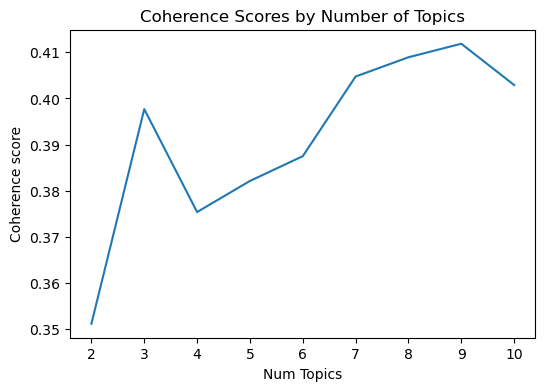

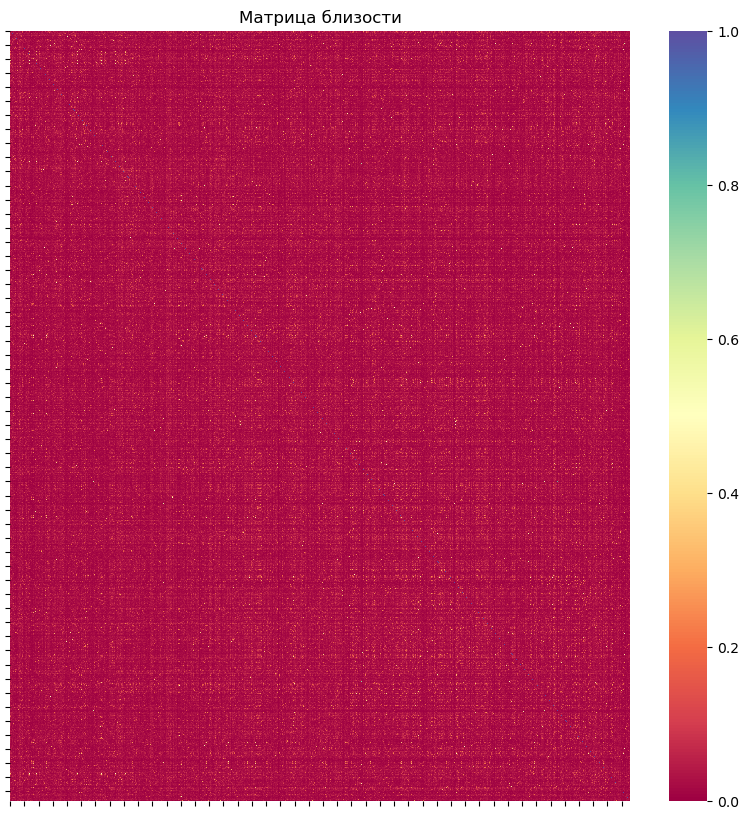

In [17]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

## Модели скрытых тем


![рисунок](img/word2topic2doc.png)

### Латентно-семантический анализ [LSI]

Сингулярное разложение: $M'_k = U \Sigma_k V^t_k$

* $M$ – матрица слово-документ
* $U$ – матрица слово-тема
* $k$ – число тем
* $V$ - матрица документ-тема

In [19]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9)

CPU times: total: 1.11 s
Wall time: 851 ms


In [20]:
lsi.show_topics(9)

[(0,
  '0.144*"iot" + 0.126*"smart" + 0.116*"chain" + 0.113*"contract" + 0.111*"security" + 0.110*"supply" + 0.107*"energy" + 0.103*"network" + 0.094*"model" + 0.089*"scheme"'),
 (1,
  '-0.304*"supply" + -0.271*"chain" + 0.235*"iot" + 0.182*"scheme" + 0.149*"device" + 0.126*"edge" + 0.124*"privacy" + 0.120*"security" + -0.119*"food" + -0.107*"digital"'),
 (2,
  '0.680*"energy" + 0.250*"trading" + -0.231*"chain" + -0.229*"supply" + 0.154*"power" + 0.141*"market" + -0.141*"medical" + 0.136*"electricity" + 0.122*"renewable" + 0.119*"grid"'),
 (3,
  '-0.392*"supply" + -0.373*"chain" + 0.260*"contract" + -0.243*"energy" + 0.184*"smart" + -0.161*"food" + -0.144*"iot" + 0.138*"healthcare" + 0.110*"digital" + 0.104*"medical"'),
 (4,
  '0.608*"contract" + 0.402*"smart" + 0.172*"supply" + 0.170*"chain" + 0.156*"vulnerability" + 0.149*"code" + -0.131*"digital" + -0.107*"metaverse" + -0.103*"healthcare" + -0.102*"iot"'),
 (5,
  '0.472*"medical" + -0.365*"iot" + 0.255*"healthcare" + 0.249*"health" 

Как снижение размерности влияет на матрицу близости:

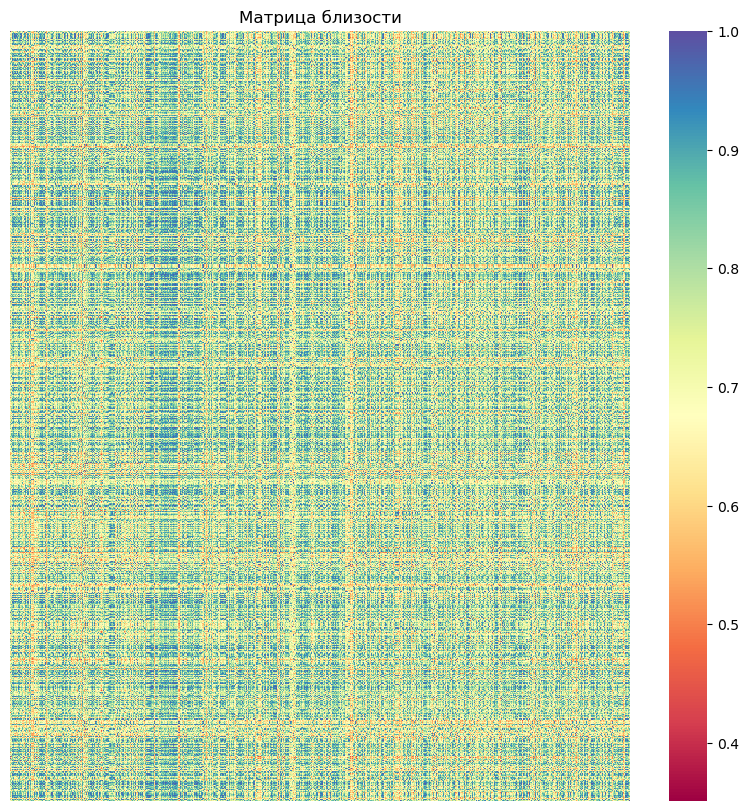

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from gensim import similarities  # Ensure you have imported this if not already done

# Assuming lsi, corpus, and similarities.MatrixSimilarity are correctly defined and initialized

# Apply the LSI model to the corpus
corpus_lsi = lsi[corpus]

# Create an index for similarity computation
index = similarities.MatrixSimilarity(lsi[corpus])

# Compute similarity scores
sims = index[corpus_lsi]

# Normalize similarity scores to range [0, 1]
sims = (sims + 1) / 2

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data=sims, cmap='Spectral', cbar=True, xticklabels=False, yticklabels=False)

# Set the title and show the plot
plt.title("Матрица близости")
plt.show()

### Главные компоненты

In [22]:
X = [0] * len(df)
Y = [0] * len(df)
for i in range(len(df)):
    vec = corpus[i]
    LSI_topics = (lsi[vec])
    try:
        for topic in LSI_topics:
            if topic[0] == 0:
                X[i] = topic[1]
            elif topic[0] == 1:
                Y[i] = topic[1]
    except:
        pass
vis_df = pd.DataFrame({'X': X, 'Y': Y, 'topic': df['Abstract'] })

In [23]:
vis_df

X         Y                                              topic
0     3.972114  0.446954  environment social governance esg disclosure r...
1     4.406800 -3.415469  study offer systematic literature review main ...
2     4.178628 -0.627884  along massive growth internet 1990s various in...
3     3.446901 -2.015211  purposethis study aim examine whether client d...
4     5.389233  3.387596  safe storage sharing medical data promoted dev...
...        ...       ...                                                ...
3660  5.374465 -1.759410  purpose article delineates pilot implementatio...
3661  5.844754  4.856946  data storage becoming difficult due network te...
3662  3.272790  0.979833  development lowenergy highperformance hardware...
3663  4.709037  0.522896  consortium chain better combine blockchain tec...
3664  2.541976 -1.803507  digital transformation era led 5g artificial i...

[3662 rows x 3 columns]

In [24]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Switch to a different backend (e.g., 'Agg' for non-interactive backends)
matplotlib.use('Agg')

plt.figure(figsize=(6, 4))

try:
    sns.scatterplot(data=vis_df.head(100), x='X', y='Y', hue='topic')
    plt.legend(title='Topic')
    plt.savefig(r'C:\Users\DeLux\Documents\Python Scripts\plot.png')  # Use raw string for the file path
    print("Plot saved successfully.")
except ValueError as e:
    print(f"Error while plotting: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Plot saved successfully.


### Латентное размещение Дирихле [LDA]

Генеративная модель порождения документа, оценивает распределение тем по документам и слов по темам:

$p(слово|документ) = \sum_{тема} P(документ|тема) P(слово|тема)$

![](img/tm1.png)

In [25]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=9,
                        alpha='auto', eta='auto', iterations = 20, passes = 5)

CPU times: total: 14.6 s
Wall time: 12.7 s


In [26]:
lda.show_topics(9)

[(0,
  '0.025*"research" + 0.010*"paper" + 0.009*"analysis" + 0.008*"field" + 0.008*"application" + 0.008*"study" + 0.007*"intelligence" + 0.007*"knowledge" + 0.007*"ai" + 0.006*"future"'),
 (1,
  '0.013*"study" + 0.010*"digital" + 0.009*"research" + 0.008*"industry" + 0.008*"chain" + 0.007*"supply" + 0.006*"paper" + 0.006*"business" + 0.005*"new" + 0.005*"management"'),
 (2,
  '0.018*"health" + 0.012*"platform" + 0.012*"medical" + 0.009*"patient" + 0.008*"record" + 0.006*"sharing" + 0.006*"bitcoin" + 0.006*"care" + 0.006*"security" + 0.006*"nft"'),
 (3,
  '0.020*"scheme" + 0.011*"storage" + 0.010*"vehicle" + 0.009*"security" + 0.008*"proposed" + 0.008*"internet" + 0.007*"node" + 0.007*"iot" + 0.007*"communication" + 0.007*"privacy"'),
 (4,
  '0.032*"contract" + 0.030*"smart" + 0.017*"model" + 0.010*"method" + 0.008*"proposed" + 0.008*"detection" + 0.007*"network" + 0.007*"learning" + 0.006*"result" + 0.006*"code"'),
 (5,
  '0.015*"chain" + 0.013*"information" + 0.011*"management" + 0.

In [27]:
import gensim

In [ ]:
!pip install pyLDAvis

In [28]:
import pyLDAvis

In [29]:
import pyLDAvis.gensim_models as gensimvis

In [30]:
import pyLDAvis.gensim_models


In [31]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

In [ ]:
#!pip install --upgrade ipykernel

In [33]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode()

def plot_difference(mdiff, title="", annotation=None):
    """
    Helper function for plot difference between models
    """
    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=500, height=500, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))

In [34]:
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your LDA difference plotting code
mdiff, annotation = lda.diff(lda, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

### TSNE

In [36]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.Abstract)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df contains your data and has an 'Abstract' column
vectors = TfidfVectorizer().fit_transform(df.Abstract)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

# If you don't have a predefined category, you could create one:
# For example, use a clustering algorithm to create categories
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=10, random_state=0).fit(X_embedded)
# df['topic'] = kmeans.labels_

# Or assume 'topic' is predefined:
# df['topic'] = ... # assign your topics here
# Now create the DataFrame for plotting
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_embedded)
df['topic'] = kmeans.labels_

vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic': df['topic']})


# Use a smaller number of facets if there are many unique topics
g = sns.FacetGrid(vis_df, hue="topic", height=6, aspect=1.5)  # Reduced height and aspect ratio
g = g.map(plt.scatter, "X", "Y").add_legend()

plt.show()
print(df['topic'].unique())  # Check the unique topic values
print(vis_df.head())  # Inspect the data used for plotting

[9 4 5 6 2 8 7 3 0 1]
           X          Y  topic
0  25.046698   7.173790      9
1 -40.511688  64.697350      4
2 -48.912640  34.517540      4
3 -52.086918 -45.485806      5
4  51.868465  50.156361      6


In [ ]:
7